In [4]:
import os 

from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
# import dask.dataframe as dd
import pyarrow as pa
import pyarrow.parquet as pq
import numpy as np
import seaborn as sns


In [5]:
current_dir = current_dir = os.getcwd()
data_dir = os.path.join(current_dir)


#print(os.path.join(data_dir, 'unified_data_final.csv'))

merged_df = pd.read_csv(os.path.join(data_dir, 'onebigtable.csv'))


Total conversions: 27987
High-value conversions: 186
Low-value conversions: 27798


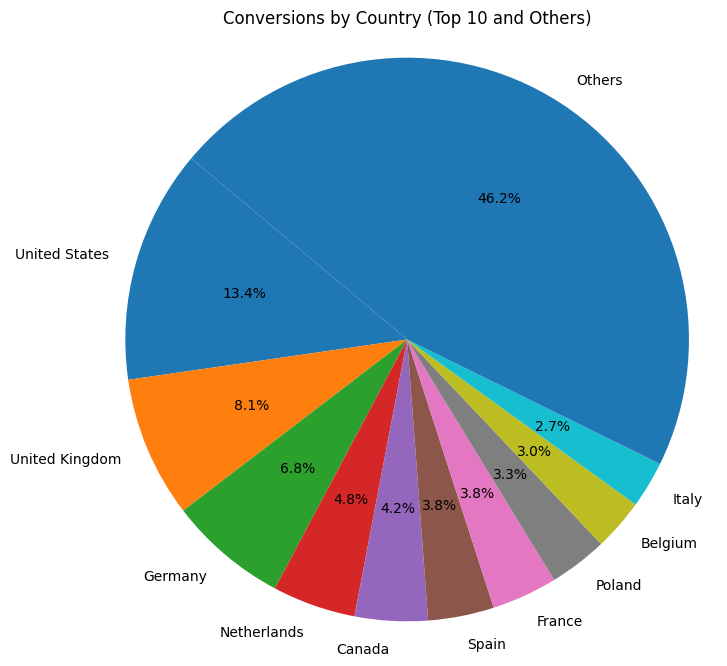

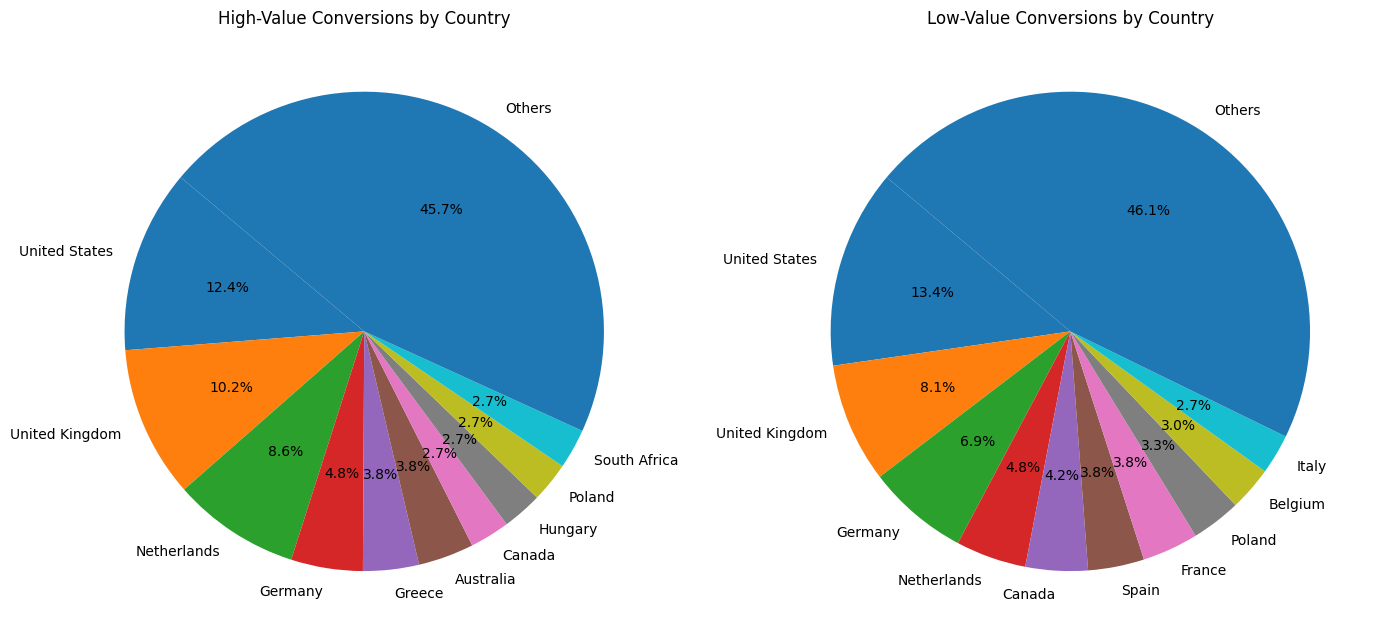

Top 10 UI elements for high-value conversions:
ui_element
dynamic score top broker list row                75
broker-name-link                                 18
mobile-chapter-2-top5-box                        14
fmb broker list item link                        12
desktop-top5-box                                 10
interactive-param-table-name-link                 6
top2-top-5-box-visit-broker-link-desktop          6
popularity-box-whole-row-link                     5
broker-listpage-visit-broker-button-name-link     4
front-page-visit-broker-button                    3
Name: count, dtype: int64

Top 10 UI elements for all conversions:
ui_element
dynamic score top broker list row           9909
fmb broker list item link                   3807
mobile-chapter-2-top5-box                   3577
desktop-top5-box                            2351
broker-name-link                            2170
interactive-param-table-name-link            852
popularity-box-whole-row-link                793
t

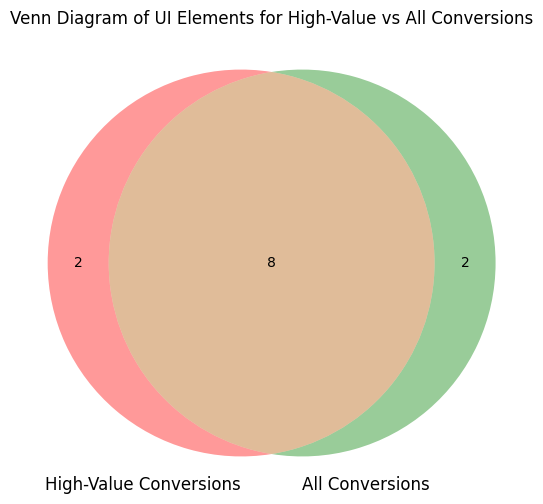

High-value conversions - Mobile vs Desktop:
is_mobile
0    124
1     62
Name: count, dtype: int64
Overall conversions - Mobile vs Desktop:
is_mobile
1    14182
0    13805
Name: count, dtype: int64
Top 5 page categories for high-value conversions:
page_name
Best brokers - general      51
Best brokers - citizen      36
Broker reviews - general    21
Country pages               16
Broker reviews - silo       13
Top2 pages                  12
Find my broker              12
Not categorized              6
Home page                    4
Comparison table             3
Name: count, dtype: int64
Top 5 page categories for all conversions:
page_name
Best brokers - general                 5749
Best brokers - citizen                 4353
Find my broker                         3807
Country pages                          3281
Broker reviews - general               2026
Not categorized                        1434
Broker reviews - silo                  1385
Top2 pages                              744
Co

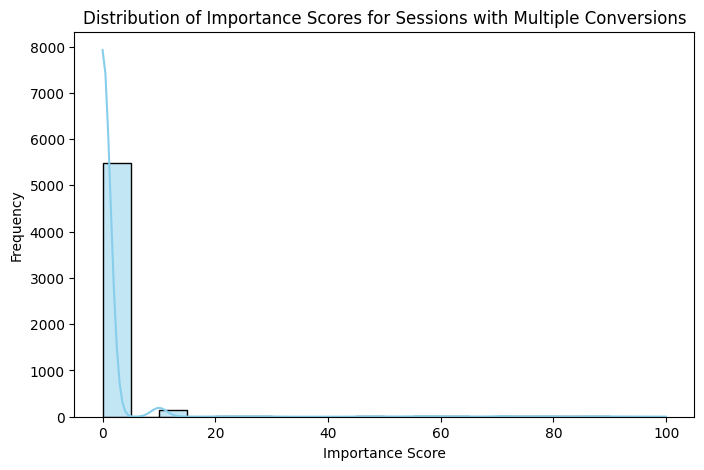

Top 5 UI elements for sessions with multiple conversions:
ui_element
dynamic score top broker list row    2016
fmb broker list item link             813
desktop-top5-box                      435
mobile-chapter-2-top5-box             433
broker-name-link                      431
Name: count, dtype: int64


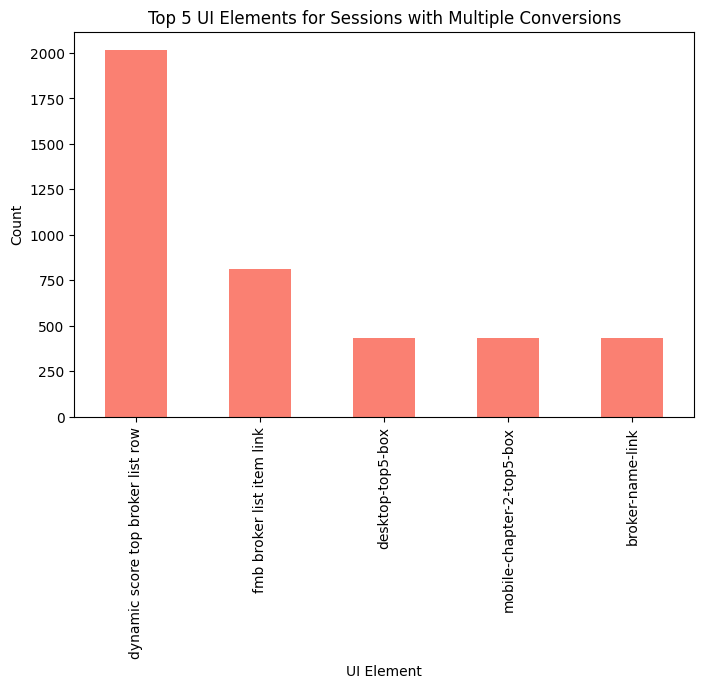

Top 5 Page Categories for sessions with multiple conversions:
page_name
Best brokers - general      1322
Best brokers - citizen       988
Find my broker               813
Country pages                599
Broker reviews - general     517
Name: count, dtype: int64


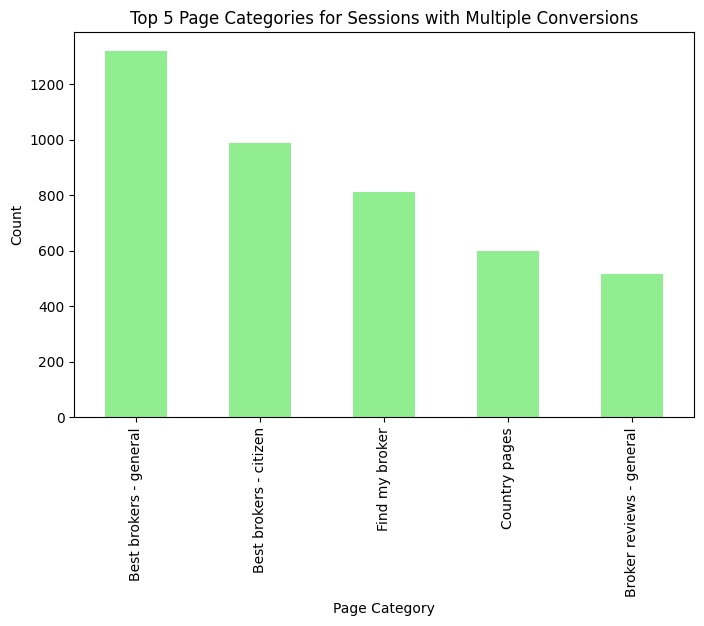

Number of sessions where the same user converted multiple times: 2534
Total sessions with multiple conversions: 2534
Percentage of sessions where the same user converted multiple times: 100.00%
Percentage of sessions using mobile in multiple conversion sessions: 47.87%
Top 5 countries in sessions with multiple conversions:
country_name
United States     698
United Kingdom    509
Germany           401
Netherlands       278
Canada            262
Name: count, dtype: int64
Number of distinct conversions by important score bins:
score_bin
(0, 10]      478
(10, 20]      29
(20, 30]      36
(30, 40]      23
(40, 50]      36
(50, 60]      41
(60, 70]      40
(70, 80]      38
(80, 90]      32
(90, 100]     35
Name: id, dtype: int64


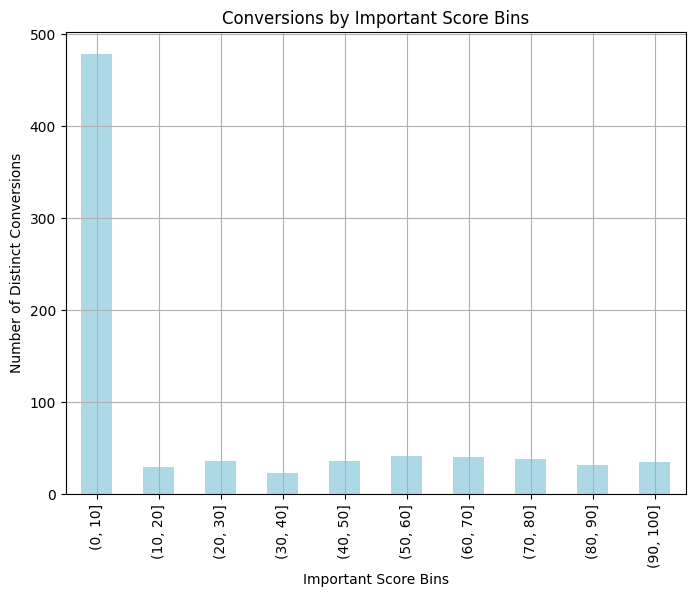

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [6]:


# merged_df is the unified dataset we created using data processing pipeline
#merged_df = composite_merge

### 1. Customer Segmentation by Value
# Segmenting customers into high-value and low-value groups based on 'important_score'.
highvalue_conv = merged_df[merged_df['important_score'] > 50]
lowvalue_conv = merged_df[merged_df['important_score'] < 50]

### 2. Analyzing Conversion Volumes
# Overview of total, high-value, and low-value conversions.
total_conversions = merged_df['composite_key'].nunique()
highvalue_conversions = highvalue_conv['composite_key'].nunique()
lowvalue_conversions = lowvalue_conv['composite_key'].nunique()

print(f"Total conversions: {total_conversions}")
print(f"High-value conversions: {highvalue_conversions}")
print(f"Low-value conversions: {lowvalue_conversions}")

### 3. Country-Level Analysis of Conversions

# a) Overall Conversion by Country (Top 10 and Others)
top_10_countries = merged_df['country_name'].value_counts().head(10)
others_conversions = merged_df['country_name'].value_counts()[10:].sum()

top_10_with_percentage = pd.DataFrame({
    'country_name': top_10_countries.index,
    'conversions': top_10_countries.values
})
top_10_with_percentage['percentage'] = (top_10_with_percentage['conversions'] / total_conversions) * 100

# Append the 'Others' row for countries not in the top 10.
others_row = pd.DataFrame({
    'country_name': ['Others'],
    'conversions': [others_conversions],
    'percentage': [(others_conversions / total_conversions) * 100]
})
top_10_with_percentage = pd.concat([top_10_with_percentage, others_row], ignore_index=True)

# Pie Chart: Conversion Distribution by Country
plt.figure(figsize=(8, 8))
plt.pie(top_10_with_percentage['conversions'], labels=top_10_with_percentage['country_name'],
        autopct='%1.1f%%', startangle=140)
plt.title('Conversions by Country (Top 10 and Others)')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.show()

### 4. High-Value vs. Low-Value Conversions by Country

# a) High-Value Conversions
top_10_highvalue = highvalue_conv['country_name'].value_counts().head(10)
others_highvalue = highvalue_conv['country_name'].value_counts()[10:].sum()

highvalue_with_percentage = pd.DataFrame({
    'country_name': top_10_highvalue.index,
    'conversions': top_10_highvalue.values
})
highvalue_with_percentage['percentage'] = (highvalue_with_percentage['conversions'] / len(highvalue_conv)) * 100

# Add 'Others' row for high-value segment
others_row_highvalue = pd.DataFrame({
    'country_name': ['Others'],
    'conversions': [others_highvalue],
    'percentage': [(others_highvalue / len(highvalue_conv)) * 100]
})
highvalue_with_percentage = pd.concat([highvalue_with_percentage, others_row_highvalue], ignore_index=True)

# b) Low-Value Conversions
top_10_lowvalue = lowvalue_conv['country_name'].value_counts().head(10)
others_lowvalue = lowvalue_conv['country_name'].value_counts()[10:].sum()

lowvalue_with_percentage = pd.DataFrame({
    'country_name': top_10_lowvalue.index,
    'conversions': top_10_lowvalue.values
})
lowvalue_with_percentage['percentage'] = (lowvalue_with_percentage['conversions'] / len(lowvalue_conv)) * 100

# Add 'Others' row for low-value segment
others_row_lowvalue = pd.DataFrame({
    'country_name': ['Others'],
    'conversions': [others_lowvalue],
    'percentage': [(others_lowvalue / len(lowvalue_conv)) * 100]
})
lowvalue_with_percentage = pd.concat([lowvalue_with_percentage, others_row_lowvalue], ignore_index=True)

# Pie Chart: High-Value vs. Low-Value Conversions by Country
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# High-Value Conversions Pie Chart
axes[0].pie(highvalue_with_percentage['conversions'], labels=highvalue_with_percentage['country_name'],
            autopct='%1.1f%%', startangle=140)
axes[0].set_title('High-Value Conversions by Country')

# Low-Value Conversions Pie Chart
axes[1].pie(lowvalue_with_percentage['conversions'], labels=lowvalue_with_percentage['country_name'],
            autopct='%1.1f%%', startangle=140)
axes[1].set_title('Low-Value Conversions by Country')

plt.tight_layout()
plt.show()

##########################################################################################################################
############## PAR T 2 - deep ana;ysis GPT generated to be checked

# 2. UI Element Analysis
# Top 10 UI elements for high-value conversions
top_10_ui_elements_highvalue = highvalue_conv['ui_element'].value_counts().head(10)
print("Top 10 UI elements for high-value conversions:")
print(top_10_ui_elements_highvalue)

# Top 10 UI elements for all conversions
top_10_ui_elements_all = merged_df['ui_element'].value_counts().head(10)
print("\nTop 10 UI elements for all conversions:")
print(top_10_ui_elements_all)

# Get the list of UI elements
highvalue_ui_elements_set = set(top_10_ui_elements_highvalue.index)
all_ui_elements_set = set(top_10_ui_elements_all.index)

# Common UI elements in both segments
common_ui_elements = highvalue_ui_elements_set.intersection(all_ui_elements_set)
print("\nUI elements common in both high-value and overall conversions:")
print(common_ui_elements)

# Unique UI elements in the high-value segment
unique_ui_elements_highvalue = highvalue_ui_elements_set.difference(all_ui_elements_set)
print("\nUI elements unique to high-value conversions:")
print(unique_ui_elements_highvalue)

# Venn Diagram: UI Elements for High-Value vs. All Conversions
plt.figure(figsize=(8, 6))
venn2([highvalue_ui_elements_set, all_ui_elements_set], set_labels=('High-Value Conversions', 'All Conversions'))
plt.title('Venn Diagram of UI Elements for High-Value vs All Conversions')
plt.show()

# 3. Mobile vs. Desktop User Behavior
# High-value users on mobile vs desktop
highvalue_mobile_usage = highvalue_conv['is_mobile'].value_counts()
print("High-value conversions - Mobile vs Desktop:")
print(highvalue_mobile_usage)

# Overall mobile vs desktop usage for conversions
all_mobile_usage = merged_df['is_mobile'].value_counts()
print("Overall conversions - Mobile vs Desktop:")
print(all_mobile_usage)

# 4. Page Category Analysis
# Top page categories for high-value conversions
top_page_categories_highvalue = highvalue_conv['page_name'].value_counts().head(10)
print("Top 5 page categories for high-value conversions:")
print(top_page_categories_highvalue)

# Top page categories for all conversions
top_page_categories_all = merged_df['page_name'].value_counts().head(10)
print("Top 5 page categories for all conversions:")
print(top_page_categories_all)

# Top page categories for low-value conversions
top_page_categories_lowvalue = lowvalue_conv['page_name'].value_counts().head(10)
print("Top 5 page categories for low-value conversions:")
print(top_page_categories_lowvalue)

# 5. Session Analysis
# Unique values in the dataset
total_unique_conversions = merged_df['id'].nunique()
total_unique_sessions = merged_df['session_id'].nunique()
print(f"Total unique conversions: {total_unique_conversions}")
print(f"Total unique sessions: {total_unique_sessions}")

# Identifying sessions with multiple conversions
session_counts = merged_df['session_id'].value_counts()
multiple_conversion_sessions = session_counts[session_counts > 1].index

# Filter the dataset for these sessions
multiple_conv_df = merged_df[merged_df['session_id'].isin(multiple_conversion_sessions)]

# Average Importance Score for Multiple Conversions
avg_importance_multiple_conversions = multiple_conv_df['important_score'].mean()
print(f"Average importance score for sessions with multiple conversions: {avg_importance_multiple_conversions}")

# Visualization: Distribution of Importance Scores for Multiple Conversion Sessions
plt.figure(figsize=(8, 5))
sns.histplot(multiple_conv_df['important_score'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Importance Scores for Sessions with Multiple Conversions')
plt.xlabel('Importance Score')
plt.ylabel('Frequency')
plt.show()

# Top 5 UI Elements for Multiple Conversions
top_ui_elements_multiple = multiple_conv_df['ui_element'].value_counts().head(5)
print("Top 5 UI elements for sessions with multiple conversions:")
print(top_ui_elements_multiple)

# Visualization: Top UI Elements for Multiple Conversions
plt.figure(figsize=(8, 5))
top_ui_elements_multiple.plot(kind='bar', color='salmon')
plt.title('Top 5 UI Elements for Sessions with Multiple Conversions')
plt.xlabel('UI Element')
plt.ylabel('Count')
plt.show()

# Top 5 Page Categories for Multiple Conversions
top_page_categories_multiple = multiple_conv_df['page_name'].value_counts().head(5)
print("Top 5 Page Categories for sessions with multiple conversions:")
print(top_page_categories_multiple)

# Visualization: Top Page Categories for Multiple Conversions
plt.figure(figsize=(8, 5))
top_page_categories_multiple.plot(kind='bar', color='lightgreen')
plt.title('Top 5 Page Categories for Sessions with Multiple Conversions')
plt.xlabel('Page Category')
plt.ylabel('Count')
plt.show()

# Checking if the same user converted multiple times in one session
unique_users_per_session = multiple_conv_df.groupby('session_id')['id'].nunique()
multi_conversion_same_user = unique_users_per_session[unique_users_per_session > 1].count()
print(f"Number of sessions where the same user converted multiple times: {multi_conversion_same_user}")

# Summary of sessions with multiple conversions
total_multi_conversion_sessions = len(multiple_conv_df['session_id'].unique())
percentage_multi_conversion_same_user = (multi_conversion_same_user / total_multi_conversion_sessions) * 100
print(f"Total sessions with multiple conversions: {total_multi_conversion_sessions}")
print(f"Percentage of sessions where the same user converted multiple times: {percentage_multi_conversion_same_user:.2f}%")

# Percentage of sessions using mobile in multiple conversion sessions
mobile_usage_multiple_conversion = multiple_conv_df['is_mobile'].value_counts(normalize=True) * 100
mobile_percentage = mobile_usage_multiple_conversion.get(1, 0)
print(f"Percentage of sessions using mobile in multiple conversion sessions: {mobile_percentage:.2f}%")

# Top 5 countries in sessions with multiple conversions
top_countries_multiple_conversion = multiple_conv_df['country_name'].value_counts().head(5)
print("Top 5 countries in sessions with multiple conversions:")
print(top_countries_multiple_conversion)

#######################################################################################################################
############## PAR T 3 - deep ana;ysis GPT generated to be checked
# 4. Important Score Binned in Intervals of 10
# Ensure 'important_score' column is numeric
merged_df['important_score'] = pd.to_numeric(merged_df['important_score'], errors='coerce')

# Bin the scores into intervals of 10
bins = range(0, 101, 10)  # Scores from 0 to 100
merged_df['score_bin'] = pd.cut(merged_df['important_score'], bins=bins)

# Count distinct conversions for each bin
conversion_by_score_bin = merged_df.groupby('score_bin')['id'].nunique()
print("Number of distinct conversions by important score bins:")
print(conversion_by_score_bin)

# Plot the distribution of conversions by important score bins
plt.figure(figsize=(8, 6))
conversion_by_score_bin.plot(kind='bar', title='Conversions by Important Score Bins', color='lightblue')
plt.ylabel('Number of Distinct Conversions')
plt.xlabel('Important Score Bins')
plt.grid(True)
plt.show()

# Insight: 
# The frequency of users in the 0-10 score bin is high (about 62% of all users). 
# These users represent lower-value investors, indicating that ReviewFriends excels in converting beginner or low-investment users.

# Deep Analysis of Repeated Sessions
# Filter the dataset to keep only rows with multiple conversions within the same session
multiple_conv_sessions = merged_df[merged_df['session_id'].isin(multiple_conversion_sessions)]

# Sort by session_id and created_at timestamp
multiple_conv_sessions_sorted = multiple_conv_sessions.sort_values(by=['session_id', 'created_at'])

# Calculate the time difference between consecutive conversions in the same session
multiple_conv_sessions_sorted['time_diff'] = multiple_conv_sessions_sorted.groupby('session_id')['created_at'].diff()

# Display examples where multiple conversions have different times
multiple_conv_sessions_sorted_time_diff = multiple_conv_sessions_sorted[multiple_conv_sessions_sorted['time_diff'].notna()]
print(f"Number of rows with time differences between conversions: {len(multiple_conv_sessions_sorted_time_diff)}")

# Sort by time difference in descending order
multiple_conv_sessions_sorted_time_diff_desc = multiple_conv_sessions_sorted_time_diff.sort_values(by='time_diff', ascending=False)
multiple_conv_sessions_sorted_time_diff_desc.head(10)

# Convert 'time_diff' to days for better interpretation
multiple_conv_sessions_sorted_time_diff_desc['time_diff_days'] = multiple_conv_sessions_sorted_time_diff_desc['time_diff'].dt.days

# Frequency of each time_diff (in days)
time_diff_freq = multiple_conv_sessions_sorted_time_diff_desc['time_diff_days'].value_counts().sort_index()

# Plot the frequency of conversions by time difference in days
plt.figure(figsize=(10, 6))
sns.lineplot(x=time_diff_freq.index, y=time_diff_freq.values, marker='o', color='green')
plt.title('Frequency of Conversions by Time Difference (Days) in the Same Session')
plt.xlabel('Time Difference (Days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [4]:
!which python


'which' is not recognized as an internal or external command,
operable program or batch file.
